Y = Dependent Variable
X = Independent Variable

- There is a correlation between Y and X
- X affects Y

- We want to find the formula that describes this relationship

- We have only 2 variables

- They exist on the X-Y plane

These could be related to each other by a mathematical function
- sin, log, straight line, curve

In [ ]:
y = mx + c

m - slope of the line
c - yintercept

(y2-y1)/(x2-x1)

In [8]:
x = np.linspace(-10, 10, 100)

In [14]:
y = 2 * x + 5

# THIS IS A DETERMINISTIC EQUATION
# IMPOSSIBLE IN REAL LIFE

In [27]:
y = 2 * x + 5 + e

# THIS IS A PROBABILISTIC EQUATION

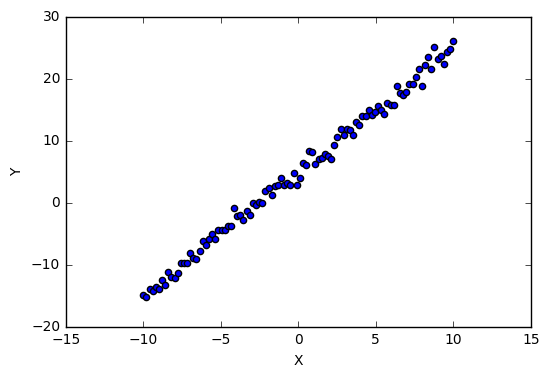

In [28]:
pd.DataFrame({'X': x, 'Y':y}).plot.scatter(x='X', y='Y');

In [ ]:
The higher the correlation between the 2 variables = the higher the slope of the line

## Forecasting aka Predicting Numeric Values

Problem:
    
- Given the history of a metric, predict future values.
- Inherently impossible.
- Need strong assumptions about regularities (i.e. model).
- Measure the goodness of fit

In [6]:
import pandas as pd
import numpy as np
import pylab as plt
%matplotlib inline

In [4]:
pd.DataFrame.corr?

In [29]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [30]:
data.shape

(200, 4)

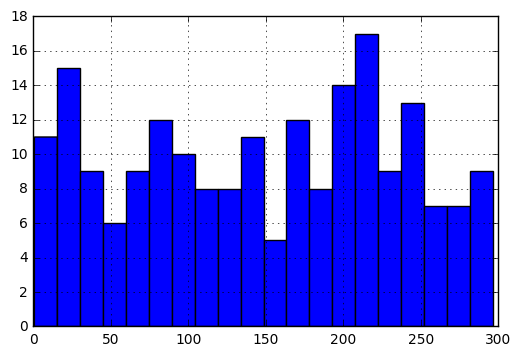

In [35]:
data['TV'].hist(bins=20)

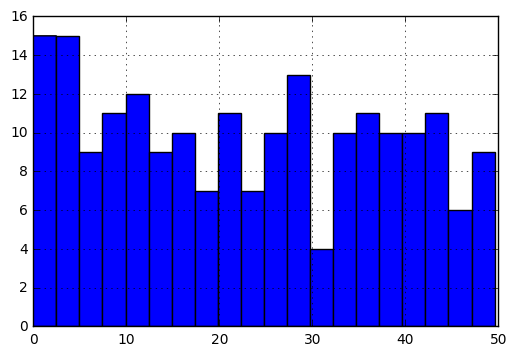

In [36]:
data['Radio'].hist(bins=20)

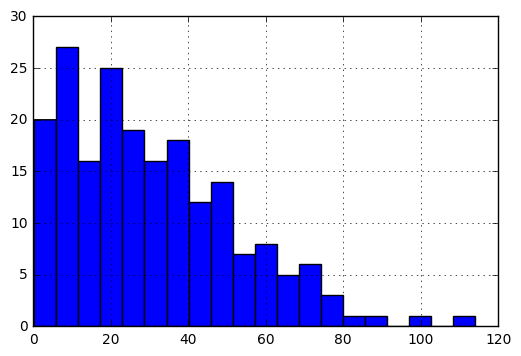

In [37]:
data['Newspaper'].hist(bins=20)

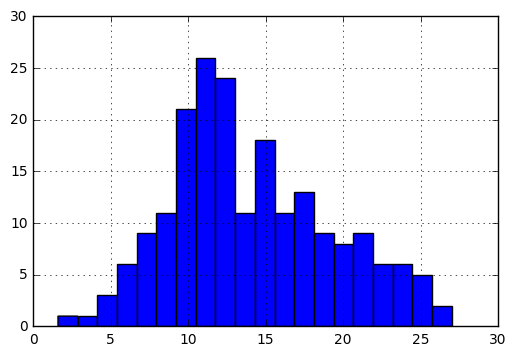

In [41]:
data['Sales'].hist(bins=20)

---

## ASSUMPTIONS OF LINEAR REGRESSION

<big><br>

1. EACH X IS CORRELATED WITH Y
2. Xs should NOT be correlated with each other. [Independence]
3. The ERROR TERMS should be STANDARD NORMALLY DISTRIBUTED

---

In [44]:
data.corr().round(2)

,TV,Radio,Newspaper,Sales
TV,1.00,0.05,0.06,0.78
Radio,0.05,1.00,0.35,0.58
Newspaper,0.06,0.35,1.00,0.23
Sales,0.78,0.58,0.23,1.00


---

<big>

The equation we're trying to find in this example looks like

- _SALES = Z + A * TV + B * NEWSPAPER + C * RADIO + ERR_

---

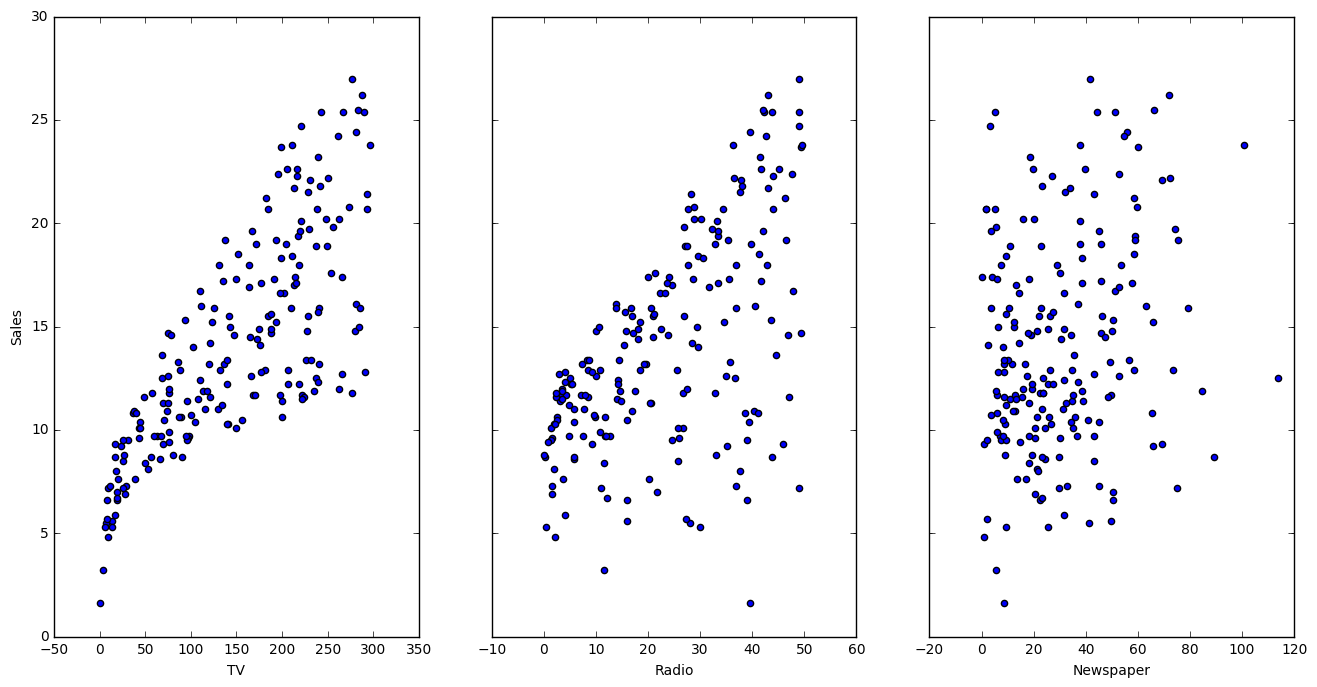

In [45]:
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16,8))
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])

## Linear Regression

$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 ... $$

$$SS_{residuals} = \sum_{i = 1}^{N} (\hat{y}_i - y_i)^2 $$

In [46]:
from sklearn import linear_model
from sklearn.cross_validation import cross_val_predict

In [47]:
lr = linear_model.LinearRegression()
# Instantiate an object called lr, that belongs to the class LinearRegression()

In [48]:
y = data.Sales
x = data[['TV', 'Newspaper', 'Radio']]

In [49]:
lr.fit(x, y)

/Users/lr/anaconda2/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
lr.predict([100, 70, 40])

/Users/lr/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 14.98393008])

In [52]:
lr.coef_

array([ 0.04576465, -0.00103749,  0.18853002])

- lr is your model.
- it was built using x and y (actual x and actual y)
- if i use x to predict y using this model, it should give me some errors
- the error will exist between the actual y and the predicted y

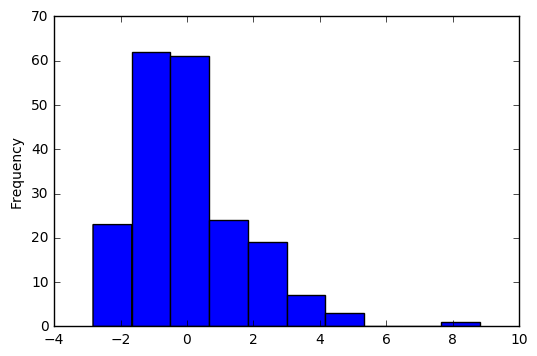

In [59]:
(lr.predict(x) - y).plot.hist()

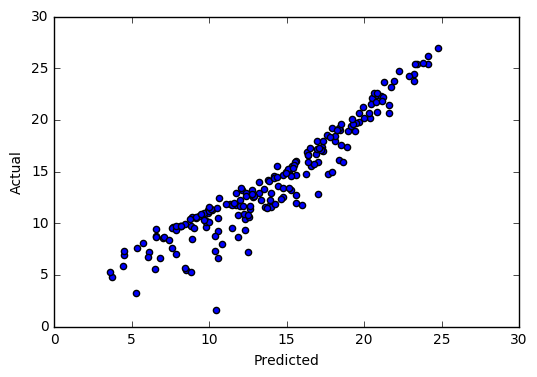

In [65]:
pd.DataFrame({'Predicted':lr.predict(x), 'Actual':y}).plot.scatter(x='Predicted', y='Actual')

In [63]:
predicted = cross_val_predict(lr, x, y, cv=10)

/Users/lr/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


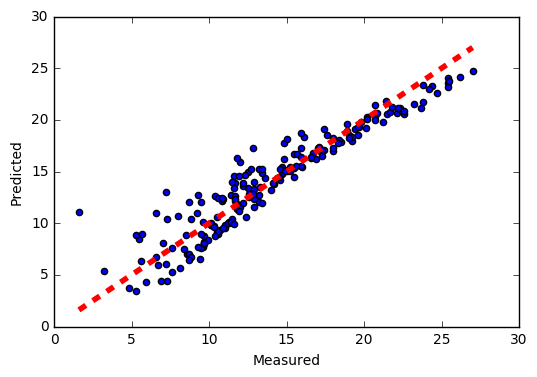

In [64]:
fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()

$$Sales = 0.445*TV + 0.004*Newspaper + 0.1915*Radio$$

NameError: name 'testY' is not defined

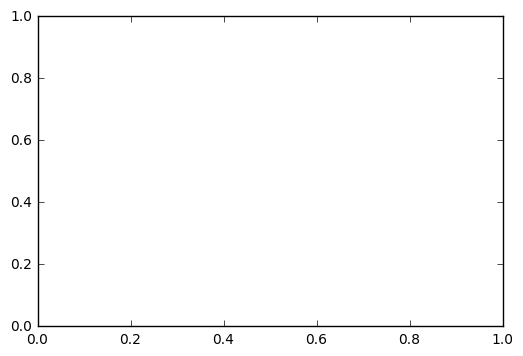

In [66]:
fig, ax = plt.subplots()
ax.scatter(testY, lr.predict(testX))
ax.plot([testY.min(), testY.max()], [testY.min(), testY.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
fig.show()

In [ ]:
def predictVal(TV, Radio, Newspaper):
    return(0.445*TV + 00.004*Newspaper + 0.1915*Radio)

In [ ]:
predictVal(200, 15, 50)

In [ ]:
predictVal(200, 15, 50)

---

## Assumption of the Linear Model

- Linear Relationship between dependent and independent variables
- Residuals should be normally distributed
- Predicted - Actual = Error (or residuals)


---

In [61]:
from IPython.display import Image
Image(url='http://upload.wikimedia.org/wikipedia/commons/thumb/2/25/The_Normal_Distribution.svg/725px-The_Normal_Distribution.svg.png')

In [67]:
residual = predicted - y

count    200.000000
mean       0.034496
std        1.753325
min       -2.908695
25%       -1.213223
50%       -0.307969
75%        0.813290
max        9.451640
Name: Sales, dtype: float64

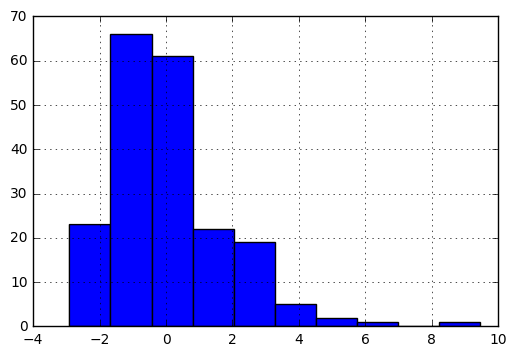

In [68]:
residual.hist()
residual.describe()

In [69]:
predictedVals = predicted
predictedStd = residual.std()
confidenceIntervals = pd.DataFrame({'lower': pd.Series(predictedVals - 1.98*predictedStd),
                                    'upper': pd.Series(predictedVals + 1.98*predictedStd)})

In [70]:
confidenceIntervals.head()

,lower,upper
0,17.217421,24.160588
1,9.133346,16.076513
2,9.279515,16.222681
3,14.340740,21.283907
4,9.802841,16.746008


In [71]:
predictedVals

array([ 20.6890044 ,  12.60492964,  12.75109796,  17.81232322,
        13.27442437,  12.97019925,  11.85107642,  12.0684915 ,
         3.69777392,  12.39877133,   7.0642882 ,  17.09296189,
        10.96225166,   8.7395866 ,  18.49672055,  20.97258435,
        13.40692097,  23.26602844,   9.99484629,  14.13089776,
        18.20622391,  14.96914934,   6.36137831,  16.7186826 ,
         8.11465158,  15.88109321,  15.0103703 ,  17.24296182,
        19.57654825,   9.09849231,  21.84376272,  11.35401026,
         7.6870869 ,  19.09111019,   7.63419533,  17.31957306,
        23.547067  ,  15.46175201,   9.79110022,  20.54258158,
        16.33329542,  17.21076391,  21.48208027,  13.98050271,
         8.883275  ,  15.12360735,   8.9208275 ,  21.5691522 ,
        16.25489581,   8.2140313 ,  12.68003362,   9.36519613,
        20.52846724,  19.81040803,  20.27296425,  21.13962427,
         8.5154205 ,  12.75328192,  21.72660014,  18.03865212,
         5.61957354,  22.93597968,  16.67485444,  13.17

In [73]:
data.mean()

TV           147.0425
Radio         23.2640
Newspaper     30.5540
Sales         14.0225
dtype: float64

## Hypothesis Testing

In [ ]:
simulatedData = np.random.normal(30, 2, 10000)

$$ H_0 : \mu = 30 $$
$$ H_A : \mu \neq 30 $$

In [ ]:
url = 'http://images.flatworldknowledge.com/shafer/shafer-fig08_004.jpg'
Image(url,height=400,width=600)

In [ ]:
randomIndex = np.random.choice(len(simulatedData), len(simulatedData)/2, False)
randomIndex

In [ ]:
simulatedData[randomIndex]

In [ ]:
simulatedData

In [ ]:
meanValues = np.zeros((1000))
for i in range(1000):
    sampledData = np.random.choice(simulatedData, len(simulatedData)/2, False)
    meanValues[i] = sampledData.mean()

In [ ]:
graph = plt.hist(meanValues, bins=50)

In [ ]:
print meanValues.mean(), meanValues.std()

In [ ]:
z = (29.97 - meanValues.mean()) / meanValues.std()
z

In [ ]:
dataTVsmall = data[data.TV < 100]
dataTVlarge = data[data.TV >= 100]
print len(dataTVsmall), len(dataTVlarge)

In [ ]:
testSmall = dataTVsmall.loc[np.random.choice(dataTVsmall.index, 40, True),:]
trainSmall = dataTVsmall.loc[np.random.choice(dataTVsmall.index, 60, True),:]
testLarge = dataTVlarge.loc[np.random.choice(dataTVlarge.index, 40, True),:]
trainLarge = dataTVlarge.loc[np.random.choice(dataTVlarge.index, 60, True),:]

In [ ]:
testData = testSmall.append(testLarge)
trainData = trainSmall.append(trainLarge)

In [ ]:
testData.head()

In [ ]:
testData[testData.TV >= 100].count()

In [ ]:
url='http://www.personal.ceu.hu/students/08/Olga_Etchevskaia/images/errors.jpg'
Image(url,height=200,width=300)